In [5]:
#CNN for Medical Image Classification (Grayscale)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import kagglehub

In [2]:
# Step 1: Download and Extract the Medical Image Dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
extract_folder = os.path.join(path, "chest_xray")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:57<00:00, 42.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [3]:
# Step 2: Load and Preprocess the Data
train_dir = os.path.join(extract_folder, "train")
val_dir = os.path.join(extract_folder, "val")
test_dir = os.path.join(extract_folder, "test")

In [4]:
# Image preprocessing and augmentation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',  # Correctly loads grayscale images
    batch_size=32,
    class_mode='binary',  # Ensures correct label format
    subset='training'
)

val_data = data_gen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    color_mode='grayscale',  # Loads grayscale images correctly
    batch_size=32,
    class_mode='binary',  # Correct classification mode
    subset='validation'
)

test_data = data_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',  # Loads grayscale images correctly
    batch_size=32,
    class_mode='binary',  # Correct classification mode
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [47]:
# Step 3: Define the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Step 4: Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - accuracy: 0.8555 - loss: 0.3920 - val_accuracy: 0.5000 - val_loss: 3.9041
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.9521 - loss: 0.1479 - val_accuracy: 0.5000 - val_loss: 4.2422
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.9522 - loss: 0.1580 - val_accuracy: 0.5000 - val_loss: 5.8322
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - accuracy: 0.9649 - loss: 0.1033 - val_accuracy: 0.5000 - val_loss: 1.3031
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.9756 - loss: 0.0698 - val_accuracy: 0.5000 - val_loss: 2.6493
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - accuracy: 0.9736 - loss: 0.0871 - val_accuracy: 0.5000 - val_loss: 1.9575
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - accuracy: 0.9811 - loss: 0.0562 - val_accuracy: 0.5000 - val_loss: 0.4901
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 207ms/step - accuracy: 0.9786 - loss: 0

In [49]:
# Step 5: Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.9631 - loss: 0.1756
Test Loss: 0.16100522875785828
Test Accuracy: 0.9677419066429138


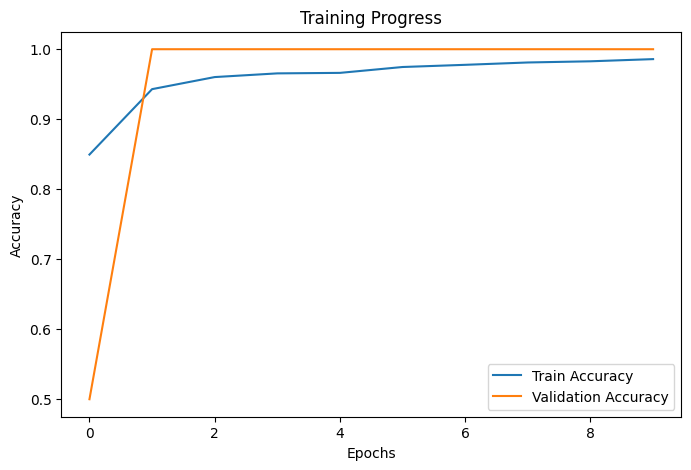

CNN Model for Medical Image Classification Completed!


In [9]:
# Step 6: Plot Training History
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()

print("CNN Model for Medical Image Classification Completed!")